In [5]:
# 分類器ディレクトリ(以下から取得)
!git clone https://github.com/opencv/opencv.git

fatal: destination path 'opencv' already exists and is not an empty directory.


### ライブラリ

In [157]:
import cv2
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
cascade_path = "./opencv/data/haarcascades/haarcascade_frontalface_default.xml" # 上述のパスをgitcloneしてきたフォルダに合わせた

### 顔写真(test.jp)のアップロード

In [159]:
from google.colab import files
uploaded = files.upload()

In [162]:
# inputsフォルダの作成
try:
    os.mkdir("./inputs")
except FileExistsError:
    pass

# outputsフォルダの作成
try:
    os.mkdir("./outputs")
except FileExistsError:
    pass

# ファイルの移動
if os.path.exists("./test.jpg") & os.path.exists("inputs/test.jpg"):
    os.remove("./inputs/test.jpg")
    try:
        shutil.move('./test.jpg', './inputs')
    except:
        pass

In [163]:
# 使用ファイルと入出力ディレクトリ
image_file = "test.jpg"
image_path = "./inputs/" + image_file
output_path = "./outputs/" + image_file

In [164]:
#ファイル読み込み
image = cv2.imread(image_path)

./opencv/data/haarcascades/haarcascade_frontalface_default.xml


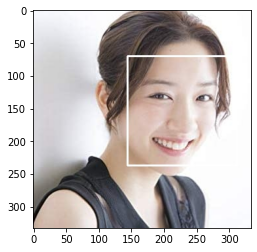

In [166]:
#カスケード分類器の特徴量を取得する
cascade = cv2.CascadeClassifier(cascade_path)
print(cascade_path)

#物体認識（顔認識）の実行
# facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30))
facerect = cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30))

color = (255, 255, 255) #白

# 検出した場合
if len(facerect) > 0:

    #検出した顔を囲む矩形の作成
    for rect in facerect:
        cv2.rectangle(image, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)

    #認識結果の保存
    cv2.imwrite(output_path, image)

img = cv2.imread(output_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### 画像の切り出し(マージンあり)

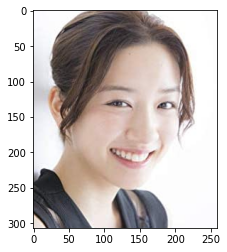

In [167]:
margin = round(rect[2]//4*1.7)

#ファイル読み込み
image = cv2.imread(image_path)
img1 = image[rect[1]-margin : rect[1]+rect[3]+margin, rect[0]-margin : rect[0]+rect[2]+margin]
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.show()